### В данном ноутбуке попробуем построить модель для классификации изображений с сайта https://quickdraw.withgoogle.com/. Данные взяты с формате .npy и представляют из себя 784 пикселя(Ниже примеры). Для моделирования будем использовать библиотеку tensorflow и keras, catboost, 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import walk
import re
from tqdm import tqdm
import uuid

In [29]:
df = pd.read_csv('F:\\doodles\\bucket_31.csv', dtype=dict(zip(range(784), [np.uint8]*784)))
df.drop(columns=['Unnamed: 0'], inplace= True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173405 entries, 0 to 173404
Columns: 785 entries, 0 to category
dtypes: int64(1), object(1), uint8(783)
memory usage: 132.1+ MB


In [31]:
df.groupby('category').count()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
category,,,,,,,,,,,,,,,,,,,,,
airplane,607,607,607,607,607,607,607,607,607,607,...,607,607,607,607,607,607,607,607,607,607
ambulance,592,592,592,592,592,592,592,592,592,592,...,592,592,592,592,592,592,592,592,592,592
angel,599,599,599,599,599,599,599,599,599,599,...,599,599,599,599,599,599,599,599,599,599
ant,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
anvil,505,505,505,505,505,505,505,505,505,505,...,505,505,505,505,505,505,505,505,505,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
windmill,483,483,483,483,483,483,483,483,483,483,...,483,483,483,483,483,483,483,483,483,483
wristwatch,651,651,651,651,651,651,651,651,651,651,...,651,651,651,651,651,651,651,651,651,651
yoga,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122,...,1122,1122,1122,1122,1122,1122,1122,1122,1122,1122


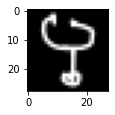

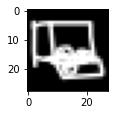

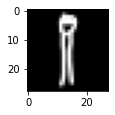

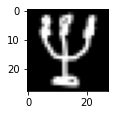

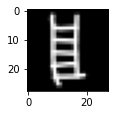

In [5]:
categories = []
for i in range(5):
    sample = df.sample(1)
    pixels = sample.drop(columns=['category']).values.reshape((28, 28))
    categories.append(sample['category'].values[0])
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [6]:
categories

['stethoscope', 'dishwasher', 'asparagus', 'chandelier', 'ladder']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(df['category'])
df["category_enc"] = le.transform(df['category'])
y = df['category_enc']
to_drop = ['category', 'category_enc']
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=to_drop), y, test_size=0.3,random_state=42)

In [ ]:
from catboost import CatBoostClassifier

clf_cat = CatBoostClassifier(task_type='GPU', max_depth=5)
clf_cat.fit(X_train, y_train)

Learning rate set to 0.216164
0:	learn: 5.3450042	total: 2.5s	remaining: 41m 32s
1:	learn: 5.1265753	total: 5.05s	remaining: 42m 1s
2:	learn: 4.9418775	total: 7.51s	remaining: 41m 34s
3:	learn: 4.8004240	total: 10.1s	remaining: 42m 4s
4:	learn: 4.6884164	total: 12.7s	remaining: 42m 2s
5:	learn: 4.5980428	total: 14.9s	remaining: 41m 13s
6:	learn: 4.4999708	total: 17.5s	remaining: 41m 24s
7:	learn: 4.4248363	total: 19.9s	remaining: 41m 7s
8:	learn: 4.3535911	total: 22.4s	remaining: 41m 4s
9:	learn: 4.2906769	total: 24.6s	remaining: 40m 39s
10:	learn: 4.2282100	total: 27.1s	remaining: 40m 40s
11:	learn: 4.1724970	total: 29.6s	remaining: 40m 35s
12:	learn: 4.1109044	total: 32s	remaining: 40m 32s
13:	learn: 4.0682544	total: 34.3s	remaining: 40m 18s
14:	learn: 4.0158360	total: 36.9s	remaining: 40m 26s
15:	learn: 3.9688694	total: 39.6s	remaining: 40m 33s
16:	learn: 3.9325557	total: 41.8s	remaining: 40m 17s
17:	learn: 3.8894705	total: 44.4s	remaining: 40m 19s
18:	learn: 3.8500454	total: 46.7s	

153:	learn: 2.4468290	total: 5m 46s	remaining: 31m 40s
154:	learn: 2.4434368	total: 5m 48s	remaining: 31m 37s
155:	learn: 2.4402391	total: 5m 50s	remaining: 31m 34s
156:	learn: 2.4367021	total: 5m 52s	remaining: 31m 31s
157:	learn: 2.4336849	total: 5m 54s	remaining: 31m 28s
158:	learn: 2.4294583	total: 5m 56s	remaining: 31m 25s
159:	learn: 2.4276020	total: 5m 58s	remaining: 31m 21s
160:	learn: 2.4258545	total: 6m	remaining: 31m 18s
161:	learn: 2.4254221	total: 6m 2s	remaining: 31m 14s
162:	learn: 2.4215245	total: 6m 4s	remaining: 31m 11s
163:	learn: 2.4197795	total: 6m 6s	remaining: 31m 7s
164:	learn: 2.4180425	total: 6m 8s	remaining: 31m 4s
165:	learn: 2.4171356	total: 6m 10s	remaining: 31m
166:	learn: 2.4131759	total: 6m 12s	remaining: 30m 58s
167:	learn: 2.4096908	total: 6m 14s	remaining: 30m 55s
168:	learn: 2.4068832	total: 6m 16s	remaining: 30m 52s
169:	learn: 2.4050663	total: 6m 18s	remaining: 30m 48s
170:	learn: 2.3991130	total: 6m 20s	remaining: 30m 46s
171:	learn: 2.3958288	to

303:	learn: 2.1723547	total: 10m 44s	remaining: 24m 36s
304:	learn: 2.1717255	total: 10m 46s	remaining: 24m 33s
305:	learn: 2.1702777	total: 10m 48s	remaining: 24m 31s
306:	learn: 2.1681402	total: 10m 50s	remaining: 24m 28s
307:	learn: 2.1669767	total: 10m 52s	remaining: 24m 26s
308:	learn: 2.1620582	total: 10m 55s	remaining: 24m 24s
309:	learn: 2.1606441	total: 10m 57s	remaining: 24m 22s
310:	learn: 2.1602353	total: 10m 58s	remaining: 24m 19s
311:	learn: 2.1600749	total: 11m	remaining: 24m 17s
312:	learn: 2.1594541	total: 11m 2s	remaining: 24m 14s
313:	learn: 2.1580661	total: 11m 4s	remaining: 24m 12s
314:	learn: 2.1547440	total: 11m 6s	remaining: 24m 10s
315:	learn: 2.1539761	total: 11m 8s	remaining: 24m 7s
316:	learn: 2.1538076	total: 11m 10s	remaining: 24m 4s
317:	learn: 2.1530077	total: 11m 12s	remaining: 24m 2s
318:	learn: 2.1522574	total: 11m 14s	remaining: 23m 59s
319:	learn: 2.1515665	total: 11m 16s	remaining: 23m 57s
320:	learn: 2.1511199	total: 11m 18s	remaining: 23m 54s
321

451:	learn: 2.0009613	total: 15m 37s	remaining: 18m 56s
452:	learn: 2.0003534	total: 15m 39s	remaining: 18m 54s
453:	learn: 1.9983487	total: 15m 41s	remaining: 18m 51s
454:	learn: 1.9976963	total: 15m 43s	remaining: 18m 49s
455:	learn: 1.9972642	total: 15m 45s	remaining: 18m 47s
456:	learn: 1.9953062	total: 15m 47s	remaining: 18m 45s
457:	learn: 1.9945105	total: 15m 49s	remaining: 18m 43s
458:	learn: 1.9916231	total: 15m 51s	remaining: 18m 41s
459:	learn: 1.9908262	total: 15m 53s	remaining: 18m 38s
460:	learn: 1.9905287	total: 15m 55s	remaining: 18m 36s
461:	learn: 1.9899994	total: 15m 56s	remaining: 18m 34s
462:	learn: 1.9895163	total: 15m 58s	remaining: 18m 32s
463:	learn: 1.9881394	total: 16m	remaining: 18m 29s
464:	learn: 1.9863881	total: 16m 2s	remaining: 18m 27s
465:	learn: 1.9857451	total: 16m 4s	remaining: 18m 25s
466:	learn: 1.9853787	total: 16m 6s	remaining: 18m 23s
467:	learn: 1.9846880	total: 16m 8s	remaining: 18m 20s
468:	learn: 1.9845807	total: 16m 10s	remaining: 18m 18s


599:	learn: 1.8717376	total: 20m 27s	remaining: 13m 38s
600:	learn: 1.8714166	total: 20m 29s	remaining: 13m 36s
601:	learn: 1.8699112	total: 20m 31s	remaining: 13m 34s
602:	learn: 1.8687632	total: 20m 33s	remaining: 13m 32s
603:	learn: 1.8683821	total: 20m 35s	remaining: 13m 30s
604:	learn: 1.8676146	total: 20m 37s	remaining: 13m 27s
605:	learn: 1.8658244	total: 20m 39s	remaining: 13m 25s
606:	learn: 1.8651183	total: 20m 41s	remaining: 13m 23s
607:	learn: 1.8643963	total: 20m 43s	remaining: 13m 21s
608:	learn: 1.8637571	total: 20m 45s	remaining: 13m 19s
609:	learn: 1.8632223	total: 20m 47s	remaining: 13m 17s
610:	learn: 1.8623456	total: 20m 49s	remaining: 13m 15s
611:	learn: 1.8617018	total: 20m 51s	remaining: 13m 13s
612:	learn: 1.8610752	total: 20m 53s	remaining: 13m 11s
613:	learn: 1.8601319	total: 20m 55s	remaining: 13m 9s
614:	learn: 1.8585987	total: 20m 57s	remaining: 13m 7s
615:	learn: 1.8576171	total: 20m 59s	remaining: 13m 4s
616:	learn: 1.8572582	total: 21m 1s	remaining: 13m 

748:	learn: 1.7563494	total: 25m 21s	remaining: 8m 29s
749:	learn: 1.7559027	total: 25m 23s	remaining: 8m 27s
750:	learn: 1.7550139	total: 25m 25s	remaining: 8m 25s
751:	learn: 1.7544031	total: 25m 27s	remaining: 8m 23s
752:	learn: 1.7542030	total: 25m 29s	remaining: 8m 21s
753:	learn: 1.7534962	total: 25m 31s	remaining: 8m 19s
754:	learn: 1.7531447	total: 25m 32s	remaining: 8m 17s
755:	learn: 1.7525711	total: 25m 34s	remaining: 8m 15s
756:	learn: 1.7524156	total: 25m 36s	remaining: 8m 13s
757:	learn: 1.7518842	total: 25m 38s	remaining: 8m 11s
758:	learn: 1.7510562	total: 25m 40s	remaining: 8m 9s
759:	learn: 1.7507379	total: 25m 42s	remaining: 8m 7s
760:	learn: 1.7500342	total: 25m 44s	remaining: 8m 5s
761:	learn: 1.7493583	total: 25m 46s	remaining: 8m 3s
762:	learn: 1.7476956	total: 25m 48s	remaining: 8m 1s
763:	learn: 1.7474931	total: 25m 50s	remaining: 7m 58s
764:	learn: 1.7470839	total: 25m 52s	remaining: 7m 56s
765:	learn: 1.7467348	total: 25m 54s	remaining: 7m 54s
766:	learn: 1.7

899:	learn: 1.6484370	total: 30m 21s	remaining: 3m 22s
900:	learn: 1.6471497	total: 30m 23s	remaining: 3m 20s
901:	learn: 1.6463173	total: 30m 25s	remaining: 3m 18s
902:	learn: 1.6455194	total: 30m 27s	remaining: 3m 16s
903:	learn: 1.6446856	total: 30m 30s	remaining: 3m 14s
904:	learn: 1.6445340	total: 30m 31s	remaining: 3m 12s
905:	learn: 1.6443238	total: 30m 33s	remaining: 3m 10s
906:	learn: 1.6438688	total: 30m 35s	remaining: 3m 8s
907:	learn: 1.6427778	total: 30m 37s	remaining: 3m 6s
908:	learn: 1.6421335	total: 30m 39s	remaining: 3m 4s
909:	learn: 1.6413655	total: 30m 41s	remaining: 3m 2s
910:	learn: 1.6411063	total: 30m 43s	remaining: 3m
911:	learn: 1.6402958	total: 30m 45s	remaining: 2m 58s
912:	learn: 1.6401113	total: 30m 47s	remaining: 2m 56s
913:	learn: 1.6390584	total: 30m 49s	remaining: 2m 54s
914:	learn: 1.6385249	total: 30m 51s	remaining: 2m 52s
915:	learn: 1.6382416	total: 30m 53s	remaining: 2m 49s


In [ ]:
from sklearn.metrics import classification_report

y_pred = [*map(lambda x: np.argmax(x), pred)]
report = pd.DataFrame.from_dict(classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)).T
report

### Бустинг скорее всего не подойдет, слишком большой датасет и максимальную глубину получается выставить только на 6, думаю для 200+ классов этого маловато. Но бустинг показывает результат точности около 40%.

### Попробуем нейронные сети, говорят они хорошо подходят.

In [7]:
import tensorflow as tf
from tensorflow import keras

tf.config.experimental.set_memory_growth(tf.config.get_visible_devices('GPU')[0], True)
DROP_OUT = 4
KERNEL_SIZE = 3
CATEGORIES = len(df['category'].unique())
model = keras.Sequential([
    keras.layers.Reshape((-1,28,28,1)),
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255.),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
        
    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Flatten(),

    keras.layers.Dense(CATEGORIES * 10, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Dense(CATEGORIES * 30, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Dense(CATEGORIES * 30, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Dense(CATEGORIES, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
file = 'F:\\doodles\\dump\\dump'
model = keras.models.load_model(file)
class_weights = None
reports = []
hists = []

In [2]:
from sklearn.metrics import classification_report
import gc

def free(to_erase):
    for obj in to_erase:
        del(obj)
    gc.collect()
    
def load_val_data(encoder):
    df = pd.read_csv('F:\\doodles\\bucket_249.csv')
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df["category_enc"] = encoder.transform(df['category'])
    y = df['category_enc']
    to_drop = ['category', 'category_enc']
    return (df.drop(columns=to_drop), y)
    
def load_data(i, encoder, pattern ='F:\\doodles\\bucket_{}.csv', test_size = 0.2):
    df = pd.read_csv(pattern.format(str(i)))
    df.drop(columns=['Unnamed: 0'], inplace= True)
    df["category_enc"] = encoder.transform(df['category'])
    y = df['category_enc']
    to_drop = ['category', 'category_enc']
    return train_test_split(df.drop(columns=to_drop), y, test_size=test_size)

def get_report(model, encoder):
    X_test, y_test = load_val_data(le)
    pred = model.predict(X_test)
    y_pred = [*map(lambda x: np.argmax(x), pred)]
    return pd.DataFrame.from_dict(classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)).T

def get_weight(value, mean, max_weight):
    value = mean / value ** 7
    return 1 if value <=1 else max_weight if value >= max_weight else value

def get_weights(model, encoder, max_weight=5, metric='f1-score', report = None):
    if report is None:
        report = get_report(model, encoder)
    mean = report[metric].mean()
    return dict((class_, get_weight(report.loc[[class_]][metric][0], mean, max_weight)) for class_ in encoder.classes_)

In [ ]:
file = 'F:\\doodles\\dump'
for i in tqdm(range(96, 250)):
    try:
        X_train, X_test, y_train, y_test = load_data(i, le)
        hist = model.fit(X_train, y_train,
                         epochs=8,
                         batch_size=350,
                         validation_data=(X_test, y_test))
        
        hists.append(hist)
        
        if i % 10 == 0:
            model.save(file)  
            
        free([X_train, X_test, y_train, y_test])
        
        report = get_report(model, le)  
        reports.append(report)
    except KeyboardInterrupt:
        print("Stopped. Current bucket is {}".format(str(i)))
        break

  0%|          | 0/154 [00:00<?, ?it/s]

Epoch 1/8
397/397 [==============================] - 42s 106ms/step - loss: 1.2101 - accuracy: 0.6956 - val_loss: 1.0171 - val_accuracy: 0.7380
Epoch 2/8
397/397 [==============================] - 42s 106ms/step - loss: 1.1297 - accuracy: 0.7118 - val_loss: 1.0095 - val_accuracy: 0.7411
Epoch 3/8
397/397 [==============================] - 42s 106ms/step - loss: 1.0718 - accuracy: 0.7230 - val_loss: 1.0151 - val_accuracy: 0.7427
Epoch 4/8
397/397 [==============================] - 42s 106ms/step - loss: 1.0224 - accuracy: 0.7327 - val_loss: 1.0246 - val_accuracy: 0.7405
Epoch 5/8
397/397 [==============================] - 42s 106ms/step - loss: 0.9714 - accuracy: 0.7416 - val_loss: 1.0189 - val_accuracy: 0.7424
Epoch 6/8
397/397 [==============================] - 42s 106ms/step - loss: 0.9246 - accuracy: 0.7509 - val_loss: 1.0381 - val_accuracy: 0.7398
Epoch 7/8
397/397 [==============================] - 42s 106ms/step - loss: 0.8772 - accuracy: 0.7610 - val_loss: 1.0573 - val_accuracy:

  1%|          | 1/154 [06:18<16:04:28, 378.22s/it]

Epoch 1/8
397/397 [==============================] - 42s 106ms/step - loss: 1.2674 - accuracy: 0.6875 - val_loss: 1.0151 - val_accuracy: 0.7409
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1458 - accuracy: 0.7089 - val_loss: 1.0219 - val_accuracy: 0.7405
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0854 - accuracy: 0.7197 - val_loss: 1.0227 - val_accuracy: 0.7403
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0324 - accuracy: 0.7296 - val_loss: 1.0429 - val_accuracy: 0.7371
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9857 - accuracy: 0.7393 - val_loss: 1.0369 - val_accuracy: 0.7365
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9387 - accuracy: 0.7483 - val_loss: 1.0502 - val_accuracy: 0.7396
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8927 - accuracy: 0.7570 - val_loss: 1.0650 - val_accuracy:

  1%|▏         | 2/154 [12:33<15:53:07, 376.23s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2805 - accuracy: 0.6848 - val_loss: 1.0615 - val_accuracy: 0.7366
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1560 - accuracy: 0.7060 - val_loss: 1.0455 - val_accuracy: 0.7362
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0947 - accuracy: 0.7178 - val_loss: 1.0381 - val_accuracy: 0.7382
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0431 - accuracy: 0.7275 - val_loss: 1.0562 - val_accuracy: 0.7354
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9974 - accuracy: 0.7368 - val_loss: 1.0635 - val_accuracy: 0.7327
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9431 - accuracy: 0.7476 - val_loss: 1.0848 - val_accuracy: 0.7349
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8950 - accuracy: 0.7583 - val_loss: 1.0878 - val_accuracy:

  2%|▏         | 3/154 [18:47<15:44:25, 375.27s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2729 - accuracy: 0.6865 - val_loss: 1.0397 - val_accuracy: 0.7380
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1480 - accuracy: 0.7089 - val_loss: 1.0275 - val_accuracy: 0.7400
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0859 - accuracy: 0.7216 - val_loss: 1.0319 - val_accuracy: 0.7400
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0326 - accuracy: 0.7311 - val_loss: 1.0389 - val_accuracy: 0.7406
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9816 - accuracy: 0.7421 - val_loss: 1.0518 - val_accuracy: 0.7384
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9322 - accuracy: 0.7514 - val_loss: 1.0506 - val_accuracy: 0.7420
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8902 - accuracy: 0.7589 - val_loss: 1.0723 - val_accuracy:

  3%|▎         | 4/154 [25:01<15:37:04, 374.83s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2822 - accuracy: 0.6837 - val_loss: 1.0275 - val_accuracy: 0.7374
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1542 - accuracy: 0.7063 - val_loss: 1.0221 - val_accuracy: 0.7392
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0934 - accuracy: 0.7185 - val_loss: 1.0326 - val_accuracy: 0.7371
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0384 - accuracy: 0.7282 - val_loss: 1.0388 - val_accuracy: 0.7365
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9881 - accuracy: 0.7389 - val_loss: 1.0562 - val_accuracy: 0.7334
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9397 - accuracy: 0.7478 - val_loss: 1.0539 - val_accuracy: 0.7364
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8977 - accuracy: 0.7569 - val_loss: 1.0645 - val_accuracy:

  3%|▎         | 5/154 [31:24<15:38:38, 377.98s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2788 - accuracy: 0.6855 - val_loss: 1.0422 - val_accuracy: 0.7369
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1554 - accuracy: 0.7063 - val_loss: 1.0532 - val_accuracy: 0.7355
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0938 - accuracy: 0.7184 - val_loss: 1.0343 - val_accuracy: 0.7390
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0381 - accuracy: 0.7309 - val_loss: 1.0432 - val_accuracy: 0.7362
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9911 - accuracy: 0.7389 - val_loss: 1.0626 - val_accuracy: 0.7338
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9417 - accuracy: 0.7479 - val_loss: 1.0694 - val_accuracy: 0.7346
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8970 - accuracy: 0.7566 - val_loss: 1.0854 - val_accuracy:

  4%|▍         | 6/154 [37:38<15:28:41, 376.50s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2873 - accuracy: 0.6837 - val_loss: 1.0320 - val_accuracy: 0.7380
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1620 - accuracy: 0.7060 - val_loss: 1.0174 - val_accuracy: 0.7368
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0982 - accuracy: 0.7186 - val_loss: 1.0299 - val_accuracy: 0.7349
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0427 - accuracy: 0.7284 - val_loss: 1.0345 - val_accuracy: 0.7362
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9936 - accuracy: 0.7378 - val_loss: 1.0538 - val_accuracy: 0.7334
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9408 - accuracy: 0.7490 - val_loss: 1.0549 - val_accuracy: 0.7366
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8942 - accuracy: 0.7578 - val_loss: 1.0650 - val_accuracy:

  5%|▍         | 7/154 [43:52<15:20:26, 375.69s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2801 - accuracy: 0.6848 - val_loss: 1.0354 - val_accuracy: 0.7388
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1584 - accuracy: 0.7066 - val_loss: 1.0316 - val_accuracy: 0.7390
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0919 - accuracy: 0.7197 - val_loss: 1.0252 - val_accuracy: 0.7431
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0429 - accuracy: 0.7277 - val_loss: 1.0424 - val_accuracy: 0.7399
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9911 - accuracy: 0.7402 - val_loss: 1.0545 - val_accuracy: 0.7376
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9418 - accuracy: 0.7485 - val_loss: 1.0644 - val_accuracy: 0.7349
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8958 - accuracy: 0.7575 - val_loss: 1.0863 - val_accuracy:

  5%|▌         | 8/154 [50:06<15:12:34, 375.03s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2853 - accuracy: 0.6830 - val_loss: 1.0436 - val_accuracy: 0.7338
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1608 - accuracy: 0.7061 - val_loss: 1.0325 - val_accuracy: 0.7368
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0960 - accuracy: 0.7183 - val_loss: 1.0379 - val_accuracy: 0.7367
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0435 - accuracy: 0.7281 - val_loss: 1.0404 - val_accuracy: 0.7356
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9934 - accuracy: 0.7372 - val_loss: 1.0555 - val_accuracy: 0.7359
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9466 - accuracy: 0.7472 - val_loss: 1.0695 - val_accuracy: 0.7331
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.8972 - accuracy: 0.7579 - val_loss: 1.0793 - val_accuracy:

  6%|▌         | 9/154 [56:19<15:04:53, 374.44s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2830 - accuracy: 0.6831 - val_loss: 1.0310 - val_accuracy: 0.7363
Epoch 2/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1596 - accuracy: 0.7059 - val_loss: 1.0307 - val_accuracy: 0.7375
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0986 - accuracy: 0.7175 - val_loss: 1.0388 - val_accuracy: 0.7362
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0478 - accuracy: 0.7277 - val_loss: 1.0333 - val_accuracy: 0.7384
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9945 - accuracy: 0.7371 - val_loss: 1.0430 - val_accuracy: 0.7371
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9470 - accuracy: 0.7466 - val_loss: 1.0565 - val_accuracy: 0.7378
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9043 - accuracy: 0.7555 - val_loss: 1.0799 - val_accuracy:

  6%|▋         | 10/154 [1:02:32<14:57:48, 374.09s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.3239 - accuracy: 0.6784 - val_loss: 1.1086 - val_accuracy: 0.7266
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1959 - accuracy: 0.7003 - val_loss: 1.0876 - val_accuracy: 0.7326
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1396 - accuracy: 0.7116 - val_loss: 1.0824 - val_accuracy: 0.7317
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0870 - accuracy: 0.7211 - val_loss: 1.1034 - val_accuracy: 0.7298
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0379 - accuracy: 0.7296 - val_loss: 1.1123 - val_accuracy: 0.7289
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9898 - accuracy: 0.7402 - val_loss: 1.1123 - val_accuracy: 0.7299
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9464 - accuracy: 0.7491 - val_loss: 1.1548 - val_accuracy:

  7%|▋         | 11/154 [1:08:45<14:50:58, 373.84s/it]

Epoch 1/8
397/397 [==============================] - 44s 112ms/step - loss: 1.3213 - accuracy: 0.6794 - val_loss: 1.1005 - val_accuracy: 0.7251
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1989 - accuracy: 0.7000 - val_loss: 1.0993 - val_accuracy: 0.7265
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1394 - accuracy: 0.7110 - val_loss: 1.1018 - val_accuracy: 0.7253
Epoch 4/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0888 - accuracy: 0.7218 - val_loss: 1.1074 - val_accuracy: 0.7231
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0405 - accuracy: 0.7293 - val_loss: 1.1233 - val_accuracy: 0.7228
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9890 - accuracy: 0.7403 - val_loss: 1.1275 - val_accuracy: 0.7232
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9434 - accuracy: 0.7477 - val_loss: 1.1606 - val_accuracy:

  8%|▊         | 12/154 [1:15:02<14:46:35, 374.62s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.3108 - accuracy: 0.6796 - val_loss: 1.0826 - val_accuracy: 0.7293
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1973 - accuracy: 0.6996 - val_loss: 1.0792 - val_accuracy: 0.7291
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1347 - accuracy: 0.7120 - val_loss: 1.0814 - val_accuracy: 0.7308
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0832 - accuracy: 0.7214 - val_loss: 1.0859 - val_accuracy: 0.7294
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0383 - accuracy: 0.7283 - val_loss: 1.0980 - val_accuracy: 0.7316
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9874 - accuracy: 0.7382 - val_loss: 1.1151 - val_accuracy: 0.7279
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9393 - accuracy: 0.7498 - val_loss: 1.1185 - val_accuracy:

  8%|▊         | 13/154 [1:21:18<14:41:30, 375.11s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.3160 - accuracy: 0.6789 - val_loss: 1.1025 - val_accuracy: 0.7263
Epoch 2/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1962 - accuracy: 0.6993 - val_loss: 1.0806 - val_accuracy: 0.7306
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1402 - accuracy: 0.7115 - val_loss: 1.0817 - val_accuracy: 0.7319
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0872 - accuracy: 0.7198 - val_loss: 1.1027 - val_accuracy: 0.7255
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0383 - accuracy: 0.7314 - val_loss: 1.1029 - val_accuracy: 0.7269
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9913 - accuracy: 0.7393 - val_loss: 1.1176 - val_accuracy: 0.7270
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9472 - accuracy: 0.7471 - val_loss: 1.1268 - val_accuracy:

  9%|▉         | 14/154 [1:27:35<14:36:16, 375.55s/it]

Epoch 1/8
397/397 [==============================] - 43s 107ms/step - loss: 1.3102 - accuracy: 0.6794 - val_loss: 1.0543 - val_accuracy: 0.7352
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1983 - accuracy: 0.6983 - val_loss: 1.0535 - val_accuracy: 0.7350
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1378 - accuracy: 0.7095 - val_loss: 1.0548 - val_accuracy: 0.7344
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0901 - accuracy: 0.7212 - val_loss: 1.0692 - val_accuracy: 0.7324
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0411 - accuracy: 0.7293 - val_loss: 1.0767 - val_accuracy: 0.7336
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9900 - accuracy: 0.7381 - val_loss: 1.1016 - val_accuracy: 0.7307
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9441 - accuracy: 0.7473 - val_loss: 1.1067 - val_accuracy:

 10%|▉         | 15/154 [1:34:00<14:36:34, 378.38s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.3029 - accuracy: 0.6818 - val_loss: 1.0808 - val_accuracy: 0.7288
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1908 - accuracy: 0.7018 - val_loss: 1.0860 - val_accuracy: 0.7259
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1289 - accuracy: 0.7134 - val_loss: 1.0773 - val_accuracy: 0.7303
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0774 - accuracy: 0.7227 - val_loss: 1.0791 - val_accuracy: 0.7306
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0336 - accuracy: 0.7307 - val_loss: 1.0916 - val_accuracy: 0.7297
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9821 - accuracy: 0.7419 - val_loss: 1.1118 - val_accuracy: 0.7287
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9401 - accuracy: 0.7497 - val_loss: 1.1126 - val_accuracy:

 10%|█         | 16/154 [1:40:13<14:26:50, 376.89s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.3016 - accuracy: 0.6815 - val_loss: 1.0876 - val_accuracy: 0.7307
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1869 - accuracy: 0.7006 - val_loss: 1.0871 - val_accuracy: 0.7324
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1297 - accuracy: 0.7124 - val_loss: 1.0888 - val_accuracy: 0.7326
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0740 - accuracy: 0.7220 - val_loss: 1.0952 - val_accuracy: 0.7303
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0313 - accuracy: 0.7328 - val_loss: 1.1089 - val_accuracy: 0.7303
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9825 - accuracy: 0.7415 - val_loss: 1.1259 - val_accuracy: 0.7267
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9350 - accuracy: 0.7507 - val_loss: 1.1357 - val_accuracy:

 11%|█         | 17/154 [1:46:29<14:20:10, 376.72s/it]

Epoch 1/8
397/397 [==============================] - 45s 114ms/step - loss: 1.2926 - accuracy: 0.6858 - val_loss: 1.0986 - val_accuracy: 0.7282
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1827 - accuracy: 0.7050 - val_loss: 1.1000 - val_accuracy: 0.7268
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1265 - accuracy: 0.7138 - val_loss: 1.0983 - val_accuracy: 0.7281
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0756 - accuracy: 0.7233 - val_loss: 1.1109 - val_accuracy: 0.7258
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0247 - accuracy: 0.7346 - val_loss: 1.1227 - val_accuracy: 0.7268
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9802 - accuracy: 0.7426 - val_loss: 1.1272 - val_accuracy: 0.7265
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9279 - accuracy: 0.7540 - val_loss: 1.1390 - val_accuracy:

 12%|█▏        | 18/154 [1:52:47<14:14:15, 376.88s/it]

Epoch 1/8
397/397 [==============================] - 45s 114ms/step - loss: 1.2976 - accuracy: 0.6815 - val_loss: 1.0556 - val_accuracy: 0.7364
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1824 - accuracy: 0.7017 - val_loss: 1.0586 - val_accuracy: 0.7354
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1208 - accuracy: 0.7138 - val_loss: 1.0523 - val_accuracy: 0.7379
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0696 - accuracy: 0.7242 - val_loss: 1.0760 - val_accuracy: 0.7324
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0252 - accuracy: 0.7323 - val_loss: 1.0682 - val_accuracy: 0.7353
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9783 - accuracy: 0.7421 - val_loss: 1.0921 - val_accuracy: 0.7363
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9343 - accuracy: 0.7500 - val_loss: 1.1155 - val_accuracy:

 12%|█▏        | 19/154 [1:59:04<14:08:09, 376.96s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.3049 - accuracy: 0.6829 - val_loss: 1.0711 - val_accuracy: 0.7301
Epoch 2/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1906 - accuracy: 0.7016 - val_loss: 1.0488 - val_accuracy: 0.7353
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1313 - accuracy: 0.7139 - val_loss: 1.0596 - val_accuracy: 0.7333
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0792 - accuracy: 0.7226 - val_loss: 1.0786 - val_accuracy: 0.7315
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0354 - accuracy: 0.7337 - val_loss: 1.0824 - val_accuracy: 0.7314
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9867 - accuracy: 0.7409 - val_loss: 1.0905 - val_accuracy: 0.7296
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9413 - accuracy: 0.7499 - val_loss: 1.1076 - val_accuracy:

 13%|█▎        | 20/154 [2:05:17<13:59:38, 375.96s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.3084 - accuracy: 0.6808 - val_loss: 1.0772 - val_accuracy: 0.7316
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1940 - accuracy: 0.7010 - val_loss: 1.0703 - val_accuracy: 0.7310
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1328 - accuracy: 0.7134 - val_loss: 1.0710 - val_accuracy: 0.7332
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0797 - accuracy: 0.7226 - val_loss: 1.0635 - val_accuracy: 0.7365
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0322 - accuracy: 0.7315 - val_loss: 1.0820 - val_accuracy: 0.7325
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9900 - accuracy: 0.7392 - val_loss: 1.0967 - val_accuracy: 0.7326
Epoch 7/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9432 - accuracy: 0.7483 - val_loss: 1.1241 - val_accuracy:

 14%|█▎        | 21/154 [2:11:31<13:51:46, 375.24s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2961 - accuracy: 0.6841 - val_loss: 1.0681 - val_accuracy: 0.7318
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1851 - accuracy: 0.7038 - val_loss: 1.0663 - val_accuracy: 0.7344
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1308 - accuracy: 0.7129 - val_loss: 1.0723 - val_accuracy: 0.7338
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0768 - accuracy: 0.7227 - val_loss: 1.0851 - val_accuracy: 0.7309
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0306 - accuracy: 0.7322 - val_loss: 1.0831 - val_accuracy: 0.7321
Epoch 6/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9818 - accuracy: 0.7416 - val_loss: 1.1072 - val_accuracy: 0.7282
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9358 - accuracy: 0.7507 - val_loss: 1.1206 - val_accuracy:

 14%|█▍        | 22/154 [2:17:44<13:44:13, 374.65s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2944 - accuracy: 0.6841 - val_loss: 1.0673 - val_accuracy: 0.7339
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1799 - accuracy: 0.7033 - val_loss: 1.0678 - val_accuracy: 0.7345
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1223 - accuracy: 0.7153 - val_loss: 1.0627 - val_accuracy: 0.7365
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0742 - accuracy: 0.7237 - val_loss: 1.0817 - val_accuracy: 0.7323
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0270 - accuracy: 0.7330 - val_loss: 1.0873 - val_accuracy: 0.7338
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9841 - accuracy: 0.7398 - val_loss: 1.0957 - val_accuracy: 0.7318
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9349 - accuracy: 0.7519 - val_loss: 1.1230 - val_accuracy:

 15%|█▍        | 23/154 [2:23:58<13:37:23, 374.38s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2926 - accuracy: 0.6832 - val_loss: 1.0712 - val_accuracy: 0.7320
Epoch 2/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1837 - accuracy: 0.7033 - val_loss: 1.0679 - val_accuracy: 0.7325
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1232 - accuracy: 0.7142 - val_loss: 1.0722 - val_accuracy: 0.7318
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0699 - accuracy: 0.7251 - val_loss: 1.0939 - val_accuracy: 0.7287
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0280 - accuracy: 0.7329 - val_loss: 1.0759 - val_accuracy: 0.7356
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9765 - accuracy: 0.7416 - val_loss: 1.1019 - val_accuracy: 0.7307
Epoch 7/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9369 - accuracy: 0.7512 - val_loss: 1.1104 - val_accuracy:

 16%|█▌        | 24/154 [2:30:15<13:32:37, 375.05s/it]

Epoch 1/8
397/397 [==============================] - 45s 113ms/step - loss: 1.2879 - accuracy: 0.6837 - val_loss: 1.0519 - val_accuracy: 0.7362
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1731 - accuracy: 0.7046 - val_loss: 1.0416 - val_accuracy: 0.7380
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1114 - accuracy: 0.7155 - val_loss: 1.0507 - val_accuracy: 0.7377
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0630 - accuracy: 0.7256 - val_loss: 1.0481 - val_accuracy: 0.7387
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0135 - accuracy: 0.7363 - val_loss: 1.0573 - val_accuracy: 0.7377
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9721 - accuracy: 0.7439 - val_loss: 1.0763 - val_accuracy: 0.7363
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9235 - accuracy: 0.7536 - val_loss: 1.0934 - val_accuracy:

 16%|█▌        | 25/154 [2:36:41<13:33:51, 378.54s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2917 - accuracy: 0.6840 - val_loss: 1.0747 - val_accuracy: 0.7298
Epoch 2/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1759 - accuracy: 0.7054 - val_loss: 1.0696 - val_accuracy: 0.7305
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1193 - accuracy: 0.7164 - val_loss: 1.0622 - val_accuracy: 0.7335
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0708 - accuracy: 0.7249 - val_loss: 1.0727 - val_accuracy: 0.7350
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0263 - accuracy: 0.7332 - val_loss: 1.0808 - val_accuracy: 0.7339
Epoch 6/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9773 - accuracy: 0.7429 - val_loss: 1.0995 - val_accuracy: 0.7316
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9347 - accuracy: 0.7502 - val_loss: 1.1187 - val_accuracy:

 17%|█▋        | 26/154 [2:42:57<13:25:56, 377.78s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2789 - accuracy: 0.6871 - val_loss: 1.0714 - val_accuracy: 0.7359
Epoch 2/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1677 - accuracy: 0.7064 - val_loss: 1.0554 - val_accuracy: 0.7371
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1110 - accuracy: 0.7165 - val_loss: 1.0982 - val_accuracy: 0.7303
Epoch 4/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0834 - accuracy: 0.7212 - val_loss: 1.0716 - val_accuracy: 0.7355
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0210 - accuracy: 0.7346 - val_loss: 1.0753 - val_accuracy: 0.7362
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9749 - accuracy: 0.7426 - val_loss: 1.1108 - val_accuracy: 0.7299
Epoch 7/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9304 - accuracy: 0.7526 - val_loss: 1.1098 - val_accuracy:

 18%|█▊        | 27/154 [2:49:13<13:18:32, 377.26s/it]

Epoch 1/8
397/397 [==============================] - 45s 114ms/step - loss: 1.2794 - accuracy: 0.6864 - val_loss: 1.0757 - val_accuracy: 0.7360
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1725 - accuracy: 0.7053 - val_loss: 1.0634 - val_accuracy: 0.7371
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1152 - accuracy: 0.7158 - val_loss: 1.0792 - val_accuracy: 0.7341
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0638 - accuracy: 0.7264 - val_loss: 1.0796 - val_accuracy: 0.7350
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0211 - accuracy: 0.7348 - val_loss: 1.0971 - val_accuracy: 0.7347
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9710 - accuracy: 0.7439 - val_loss: 1.1081 - val_accuracy: 0.7342
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9312 - accuracy: 0.7512 - val_loss: 1.1258 - val_accuracy:

 18%|█▊        | 28/154 [2:55:31<13:12:20, 377.30s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2895 - accuracy: 0.6857 - val_loss: 1.0811 - val_accuracy: 0.7320
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1803 - accuracy: 0.7046 - val_loss: 1.0734 - val_accuracy: 0.7335
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1194 - accuracy: 0.7153 - val_loss: 1.0750 - val_accuracy: 0.7361
Epoch 4/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0743 - accuracy: 0.7243 - val_loss: 1.0765 - val_accuracy: 0.7332
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0296 - accuracy: 0.7332 - val_loss: 1.0954 - val_accuracy: 0.7306
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9829 - accuracy: 0.7429 - val_loss: 1.0983 - val_accuracy: 0.7342
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9369 - accuracy: 0.7501 - val_loss: 1.1194 - val_accuracy:

 19%|█▉        | 29/154 [3:01:46<13:05:02, 376.82s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2704 - accuracy: 0.6893 - val_loss: 1.0610 - val_accuracy: 0.7370
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1713 - accuracy: 0.7057 - val_loss: 1.0578 - val_accuracy: 0.7379
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1087 - accuracy: 0.7190 - val_loss: 1.0549 - val_accuracy: 0.7399
Epoch 4/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0633 - accuracy: 0.7267 - val_loss: 1.0609 - val_accuracy: 0.7386
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0173 - accuracy: 0.7354 - val_loss: 1.0756 - val_accuracy: 0.7377
Epoch 6/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9778 - accuracy: 0.7426 - val_loss: 1.0736 - val_accuracy: 0.7383
Epoch 7/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9298 - accuracy: 0.7534 - val_loss: 1.1024 - val_accuracy:

 19%|█▉        | 30/154 [3:08:02<12:58:14, 376.56s/it]

Epoch 1/8
397/397 [==============================] - 45s 113ms/step - loss: 1.2776 - accuracy: 0.6870 - val_loss: 1.0628 - val_accuracy: 0.7331
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1709 - accuracy: 0.7057 - val_loss: 1.0654 - val_accuracy: 0.7323
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1194 - accuracy: 0.7168 - val_loss: 1.0582 - val_accuracy: 0.7342
Epoch 4/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0652 - accuracy: 0.7259 - val_loss: 1.0826 - val_accuracy: 0.7313
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0255 - accuracy: 0.7336 - val_loss: 1.0821 - val_accuracy: 0.7329
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9833 - accuracy: 0.7421 - val_loss: 1.0942 - val_accuracy: 0.7323
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9389 - accuracy: 0.7510 - val_loss: 1.1113 - val_accuracy:

 20%|██        | 31/154 [3:14:19<12:52:06, 376.64s/it]

Epoch 1/8
397/397 [==============================] - 41s 105ms/step - loss: 1.2819 - accuracy: 0.6861 - val_loss: 1.0544 - val_accuracy: 0.7359
Epoch 2/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1751 - accuracy: 0.7043 - val_loss: 1.0340 - val_accuracy: 0.7422
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1175 - accuracy: 0.7152 - val_loss: 1.0422 - val_accuracy: 0.7404
Epoch 4/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0724 - accuracy: 0.7235 - val_loss: 1.0592 - val_accuracy: 0.7370
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0259 - accuracy: 0.7334 - val_loss: 1.0618 - val_accuracy: 0.7386
Epoch 6/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9806 - accuracy: 0.7438 - val_loss: 1.0722 - val_accuracy: 0.7377
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9378 - accuracy: 0.7500 - val_loss: 1.0944 - val_accuracy:

 21%|██        | 32/154 [3:20:33<12:43:57, 375.72s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2794 - accuracy: 0.6864 - val_loss: 1.0637 - val_accuracy: 0.7354
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1704 - accuracy: 0.7058 - val_loss: 1.0563 - val_accuracy: 0.7365
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1139 - accuracy: 0.7163 - val_loss: 1.0615 - val_accuracy: 0.7353
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0681 - accuracy: 0.7258 - val_loss: 1.0509 - val_accuracy: 0.7412
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0239 - accuracy: 0.7344 - val_loss: 1.0580 - val_accuracy: 0.7399
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9782 - accuracy: 0.7436 - val_loss: 1.0715 - val_accuracy: 0.7398
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9348 - accuracy: 0.7506 - val_loss: 1.0966 - val_accuracy:

 21%|██▏       | 33/154 [3:26:49<12:37:57, 375.85s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2731 - accuracy: 0.6873 - val_loss: 1.0736 - val_accuracy: 0.7315
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1697 - accuracy: 0.7052 - val_loss: 1.0579 - val_accuracy: 0.7361
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1142 - accuracy: 0.7162 - val_loss: 1.0635 - val_accuracy: 0.7324
Epoch 4/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0641 - accuracy: 0.7260 - val_loss: 1.0711 - val_accuracy: 0.7353
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0196 - accuracy: 0.7346 - val_loss: 1.0878 - val_accuracy: 0.7314
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9755 - accuracy: 0.7435 - val_loss: 1.0869 - val_accuracy: 0.7356
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9392 - accuracy: 0.7496 - val_loss: 1.1182 - val_accuracy:

 22%|██▏       | 34/154 [3:33:04<12:31:32, 375.77s/it]

Epoch 1/8
397/397 [==============================] - 41s 104ms/step - loss: 1.2719 - accuracy: 0.6886 - val_loss: 1.0564 - val_accuracy: 0.7375
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1710 - accuracy: 0.7055 - val_loss: 1.0576 - val_accuracy: 0.7370
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1127 - accuracy: 0.7158 - val_loss: 1.0578 - val_accuracy: 0.7385
Epoch 4/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0669 - accuracy: 0.7258 - val_loss: 1.0634 - val_accuracy: 0.7389
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0241 - accuracy: 0.7347 - val_loss: 1.0728 - val_accuracy: 0.7374
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9817 - accuracy: 0.7419 - val_loss: 1.0804 - val_accuracy: 0.7385
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9348 - accuracy: 0.7502 - val_loss: 1.1096 - val_accuracy:

 23%|██▎       | 35/154 [3:39:27<12:29:07, 377.71s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2758 - accuracy: 0.6884 - val_loss: 1.0428 - val_accuracy: 0.7327
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1706 - accuracy: 0.7069 - val_loss: 1.0444 - val_accuracy: 0.7345
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1190 - accuracy: 0.7161 - val_loss: 1.0312 - val_accuracy: 0.7412
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0724 - accuracy: 0.7255 - val_loss: 1.0546 - val_accuracy: 0.7352
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0259 - accuracy: 0.7340 - val_loss: 1.0519 - val_accuracy: 0.7365
Epoch 6/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9805 - accuracy: 0.7431 - val_loss: 1.0653 - val_accuracy: 0.7387
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9428 - accuracy: 0.7512 - val_loss: 1.0978 - val_accuracy:

 23%|██▎       | 36/154 [3:45:43<12:21:48, 377.19s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2668 - accuracy: 0.6895 - val_loss: 1.0643 - val_accuracy: 0.7379
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1651 - accuracy: 0.7069 - val_loss: 1.0579 - val_accuracy: 0.7369
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1110 - accuracy: 0.7168 - val_loss: 1.0568 - val_accuracy: 0.7407
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0635 - accuracy: 0.7264 - val_loss: 1.0640 - val_accuracy: 0.7385
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0269 - accuracy: 0.7328 - val_loss: 1.0786 - val_accuracy: 0.7378
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9743 - accuracy: 0.7437 - val_loss: 1.0929 - val_accuracy: 0.7377
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9331 - accuracy: 0.7521 - val_loss: 1.0982 - val_accuracy:

 24%|██▍       | 37/154 [3:51:59<12:14:46, 376.81s/it]

Epoch 1/8
397/397 [==============================] - 45s 114ms/step - loss: 1.2685 - accuracy: 0.6901 - val_loss: 1.0528 - val_accuracy: 0.7376
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1670 - accuracy: 0.7066 - val_loss: 1.0505 - val_accuracy: 0.7376
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1116 - accuracy: 0.7178 - val_loss: 1.0381 - val_accuracy: 0.7406
Epoch 4/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0674 - accuracy: 0.7254 - val_loss: 1.0507 - val_accuracy: 0.7392
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0215 - accuracy: 0.7346 - val_loss: 1.0636 - val_accuracy: 0.7379
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9773 - accuracy: 0.7429 - val_loss: 1.0863 - val_accuracy: 0.7355
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9385 - accuracy: 0.7502 - val_loss: 1.0853 - val_accuracy:

 25%|██▍       | 38/154 [3:58:15<12:08:32, 376.83s/it]

Epoch 1/8
397/397 [==============================] - 42s 105ms/step - loss: 1.2683 - accuracy: 0.6888 - val_loss: 1.0248 - val_accuracy: 0.7425
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1855 - accuracy: 0.7030 - val_loss: 1.0297 - val_accuracy: 0.7413
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1183 - accuracy: 0.7160 - val_loss: 1.0287 - val_accuracy: 0.7451
Epoch 4/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0751 - accuracy: 0.7248 - val_loss: 1.0281 - val_accuracy: 0.7456
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0267 - accuracy: 0.7340 - val_loss: 1.0475 - val_accuracy: 0.7420
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9825 - accuracy: 0.7426 - val_loss: 1.0610 - val_accuracy: 0.7402
Epoch 7/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9465 - accuracy: 0.7495 - val_loss: 1.0630 - val_accuracy:

 25%|██▌       | 39/154 [4:04:29<12:00:06, 375.71s/it]

Epoch 1/8
397/397 [==============================] - 43s 108ms/step - loss: 1.2576 - accuracy: 0.6922 - val_loss: 1.0498 - val_accuracy: 0.7355
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1610 - accuracy: 0.7081 - val_loss: 1.0563 - val_accuracy: 0.7340
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1138 - accuracy: 0.7155 - val_loss: 1.0629 - val_accuracy: 0.7335
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0629 - accuracy: 0.7257 - val_loss: 1.0656 - val_accuracy: 0.7334
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0165 - accuracy: 0.7351 - val_loss: 1.0747 - val_accuracy: 0.7348
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9795 - accuracy: 0.7425 - val_loss: 1.0968 - val_accuracy: 0.7293
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9428 - accuracy: 0.7495 - val_loss: 1.0857 - val_accuracy:

 26%|██▌       | 40/154 [4:10:43<11:53:08, 375.33s/it]

Epoch 1/8
397/397 [==============================] - 43s 107ms/step - loss: 1.2583 - accuracy: 0.6911 - val_loss: 1.0733 - val_accuracy: 0.7314
Epoch 2/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1756 - accuracy: 0.7046 - val_loss: 1.0553 - val_accuracy: 0.7387
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1133 - accuracy: 0.7174 - val_loss: 1.0639 - val_accuracy: 0.7363
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0806 - accuracy: 0.7239 - val_loss: 1.0712 - val_accuracy: 0.7357
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0254 - accuracy: 0.7348 - val_loss: 1.0744 - val_accuracy: 0.7382
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9881 - accuracy: 0.7420 - val_loss: 1.0989 - val_accuracy: 0.7328
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9466 - accuracy: 0.7490 - val_loss: 1.0942 - val_accuracy:

 27%|██▋       | 41/154 [4:16:57<11:46:11, 374.97s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2650 - accuracy: 0.6894 - val_loss: 1.0613 - val_accuracy: 0.7362
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1668 - accuracy: 0.7063 - val_loss: 1.0465 - val_accuracy: 0.7389
Epoch 3/8
397/397 [==============================] - 41s 105ms/step - loss: 1.1185 - accuracy: 0.7158 - val_loss: 1.0699 - val_accuracy: 0.7347
Epoch 4/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0665 - accuracy: 0.7271 - val_loss: 1.0678 - val_accuracy: 0.7353
Epoch 5/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0218 - accuracy: 0.7356 - val_loss: 1.0714 - val_accuracy: 0.7388
Epoch 6/8
397/397 [==============================] - 41s 105ms/step - loss: 0.9794 - accuracy: 0.7439 - val_loss: 1.0777 - val_accuracy: 0.7348
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9516 - accuracy: 0.7483 - val_loss: 1.0975 - val_accuracy:

 27%|██▋       | 42/154 [4:23:13<11:40:42, 375.38s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2594 - accuracy: 0.6920 - val_loss: 1.0696 - val_accuracy: 0.7351
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1613 - accuracy: 0.7088 - val_loss: 1.0595 - val_accuracy: 0.7402
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1112 - accuracy: 0.7188 - val_loss: 1.0629 - val_accuracy: 0.7376
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0700 - accuracy: 0.7265 - val_loss: 1.0792 - val_accuracy: 0.7356
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0259 - accuracy: 0.7347 - val_loss: 1.0793 - val_accuracy: 0.7367
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9843 - accuracy: 0.7429 - val_loss: 1.0896 - val_accuracy: 0.7366
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9480 - accuracy: 0.7501 - val_loss: 1.0969 - val_accuracy:

 28%|██▊       | 43/154 [4:29:29<11:34:47, 375.56s/it]

Epoch 1/8
397/397 [==============================] - 45s 114ms/step - loss: 1.2523 - accuracy: 0.6915 - val_loss: 1.0435 - val_accuracy: 0.7381
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1561 - accuracy: 0.7100 - val_loss: 1.0404 - val_accuracy: 0.7390
Epoch 3/8
397/397 [==============================] - 42s 105ms/step - loss: 1.1025 - accuracy: 0.7193 - val_loss: 1.0536 - val_accuracy: 0.7376
Epoch 4/8
397/397 [==============================] - 42s 105ms/step - loss: 1.0595 - accuracy: 0.7269 - val_loss: 1.0506 - val_accuracy: 0.7379
Epoch 5/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0211 - accuracy: 0.7364 - val_loss: 1.0639 - val_accuracy: 0.7373
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9768 - accuracy: 0.7440 - val_loss: 1.0841 - val_accuracy: 0.7348
Epoch 7/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9333 - accuracy: 0.7525 - val_loss: 1.0846 - val_accuracy:

 29%|██▊       | 44/154 [4:35:47<11:29:28, 376.08s/it]

Epoch 1/8
397/397 [==============================] - 44s 111ms/step - loss: 1.2667 - accuracy: 0.6911 - val_loss: 1.0522 - val_accuracy: 0.7364
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1775 - accuracy: 0.7047 - val_loss: 1.0470 - val_accuracy: 0.7405
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1299 - accuracy: 0.7139 - val_loss: 1.0589 - val_accuracy: 0.7390
Epoch 4/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0774 - accuracy: 0.7246 - val_loss: 1.0532 - val_accuracy: 0.7400
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0306 - accuracy: 0.7351 - val_loss: 1.0648 - val_accuracy: 0.7388
Epoch 6/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0055 - accuracy: 0.7381 - val_loss: 1.0825 - val_accuracy: 0.7387
Epoch 7/8
397/397 [==============================] - 41s 104ms/step - loss: 0.9611 - accuracy: 0.7476 - val_loss: 1.0902 - val_accuracy:

 29%|██▉       | 45/154 [4:42:12<11:28:10, 378.81s/it]

Epoch 1/8
397/397 [==============================] - 41s 104ms/step - loss: 1.2554 - accuracy: 0.6892 - val_loss: 1.0424 - val_accuracy: 0.7366
Epoch 2/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1612 - accuracy: 0.7083 - val_loss: 1.0439 - val_accuracy: 0.7383
Epoch 3/8
397/397 [==============================] - 41s 104ms/step - loss: 1.1079 - accuracy: 0.7183 - val_loss: 1.0501 - val_accuracy: 0.7379
Epoch 4/8
397/397 [==============================] - 41s 105ms/step - loss: 1.0602 - accuracy: 0.7276 - val_loss: 1.0602 - val_accuracy: 0.7364
Epoch 5/8
397/397 [==============================] - 41s 104ms/step - loss: 1.0282 - accuracy: 0.7334 - val_loss: 1.0663 - val_accuracy: 0.7352
Epoch 6/8
397/397 [==============================] - 42s 105ms/step - loss: 0.9809 - accuracy: 0.7425 - val_loss: 1.0778 - val_accuracy: 0.7363
Epoch 7/8
111/397 [=======>......................] - ETA: 28s - loss: 0.9288 - accuracy: 0.7535

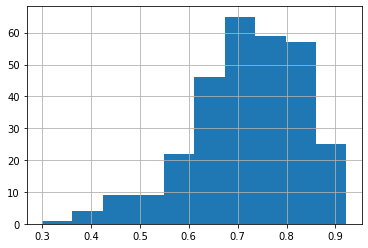

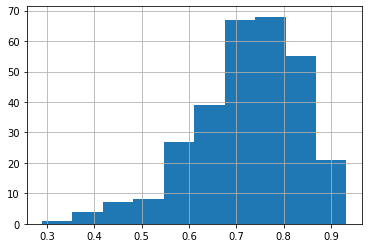

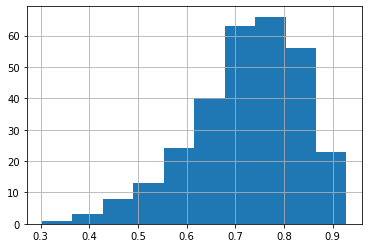

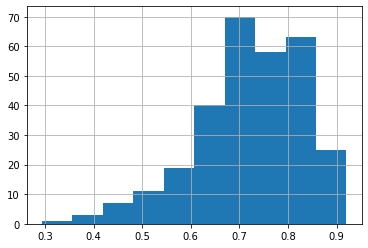

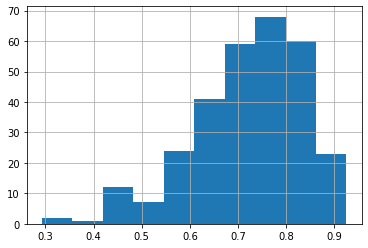

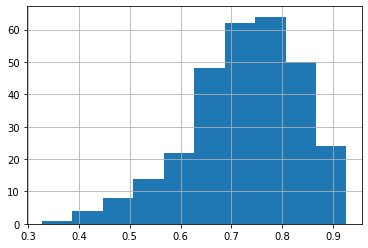

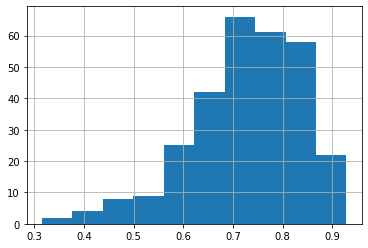

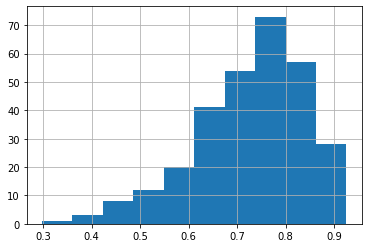

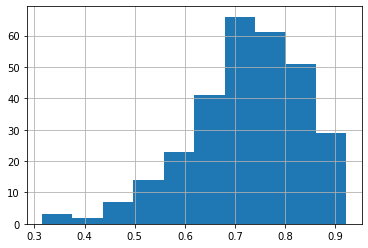

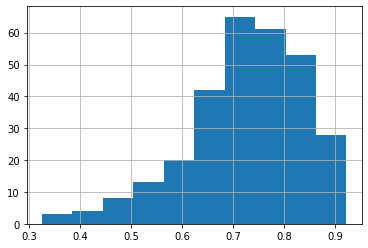

In [11]:
for report in reports:
    report['f1-score'].hist()
    plt.show()

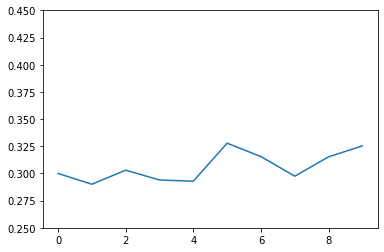

In [12]:
sns.lineplot(y=[report['f1-score'].min() for report in reports], x = range(len(reports)))
plt.ylim((0.25,0.45))
plt.show()

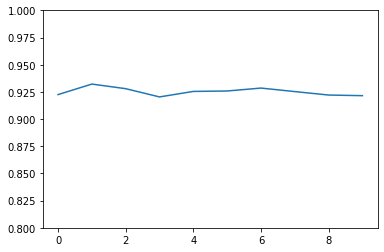

In [13]:
sns.lineplot(y=[report['f1-score'].max() for report in reports], x = range(len(reports)))
plt.ylim((0.8,1))
plt.show()

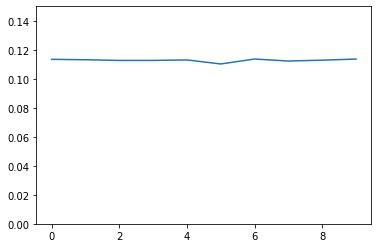

In [14]:
sns.lineplot(y=[report['f1-score'].std() for report in reports], x = range(len(reports)))
plt.ylim((0,0.15))
plt.show()

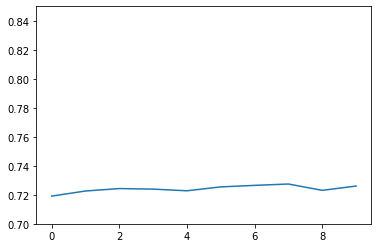

In [15]:
sns.lineplot(y=[report['f1-score'].mean() for report in reports], x = range(len(reports)))
plt.ylim((0.7,0.85))
plt.show()

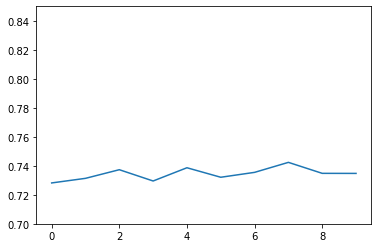

In [16]:
sns.lineplot(y=[report['f1-score'].median() for report in reports], x = range(len(reports)))
plt.ylim((0.7,0.85))
plt.show()

### Кажется мы достигли предела по качеству для этой модели. 0,7 кажется неполохим показателем, и видно что большинство классов хорошо распознаются.

### Попробуем готовые модели. Правда они принимаю картинки размером не меньше 32х32 и с 3 каналами, так что придется немного преобразовать наш датасет

In [3]:
from PIL import Image

FLAT_SIZE = 28*28
RESIZED = 56*56*3
INT = np.uint8
FILEMANE_PATTERN = 'F:\\doodles\\bucket_{}.csv'

def get_dtypes():
    return dict(zip(range(FLAT_SIZE), [INT]*FLAT_SIZE))

def rgb_and_resize(arr):
    img = arr.reshape((28, 28)).astype(INT)
    image = Image.fromarray(img).resize((56,56))
    image = image.convert('RGB')
    return np.array(image).astype(INT)

def markup(arr, category):
    return np.append(arr, np.array([[category] * arr.shape[0]]).T, axis=1)

def convert(df):
    converted_arrs = np.zeros((len(df), RESIZED), dtype = INT) 
    categories = np.array([None] * len(df))
    for i in range(len(df)):
        rgb = rgb_and_resize(df.loc[[i]].drop(columns=['category']).values)
        converted_arrs[i] = rgb.flatten()
        categories[i] = df.at[i,'category']
    result = pd.DataFrame(converted_arrs)
    result['category'] = categories
    return result
    
def load_data(i, num_of_batches):
    df = pd.read_csv(FILEMANE_PATTERN.format(str(i)), dtype=get_dtypes())
    if num_of_batches > 1:
        for j in range(i+1, i+num_of_batches):
            df.append(pd.read_csv(FILEMANE_PATTERN.format(str(j)), dtype=get_dtypes()))
    df.drop(columns=['Unnamed: 0'], inplace=True)
    return convert(df)

def load_and_split(i, encoder, test_size = 0.2, num_of_batches=1):
    df = load_data(i, num_of_batches)
    df["category_enc"] = encoder.transform(df['category'])
    y = df['category_enc']
    to_drop = ['category', 'category_enc']
    return train_test_split(df.drop(columns=to_drop), y, test_size=test_size)

In [4]:
reshaped = load_data(0, 1)

In [5]:
reshaped

,0,1,2,3,4,5,6,7,8,9,...,9399,9400,9401,9402,9403,9404,9405,9406,9407,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,airplane
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,airplane
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,airplane
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,airplane
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,airplane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,zigzag
173448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,zigzag
173449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,zigzag
173450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,zigzag


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(reshaped['category'])
reshaped["category_enc"] = le.transform(reshaped['category'])
y = reshaped['category_enc']
to_drop = ['category', 'category_enc']
X_train, X_test, y_train, y_test = train_test_split(reshaped.drop(columns=to_drop), y, test_size=0.2,random_state=42)

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import top_k_categorical_accuracy

tf.config.experimental.set_memory_growth(tf.config.get_visible_devices('GPU')[0], True)

CATEGORIES = len(reshaped['category'].unique())


inputs = keras.layers.Input(shape=(RESIZED,))
reshape = keras.layers.Reshape((56,56,3), input_shape=(RESIZED,))(inputs)
rescale = keras.layers.experimental.preprocessing.Rescaling(scale=1./255.)(reshape)

base_model = MobileNet(include_top=False,
                       weights='imagenet',
                       input_shape=(56, 56, 3),
                       dropout=0.4,
                       classes=CATEGORIES)(rescale)

pool = tf.keras.layers.GlobalMaxPool2D()(base_model)

predictions = tf.keras.layers.Dense(CATEGORIES, activation='softmax')(pool)

model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,epochs=10, batch_size=250, validation_data=(X_test, y_test))

In [12]:
free([X_train, X_test, y_train, y_test, reshaped])

### Попробовав mobilenet, mobilenetV2, efficientnet, resnet, Xeption было решено остановиться на mobilenet. Она показывала более стабильный результат. Некоторые модели за 2 эпохи переобучались до 0.6 на тренировочной выборке и 0.05 на тестовой

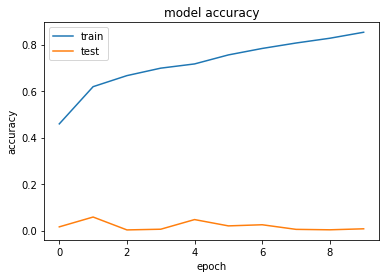

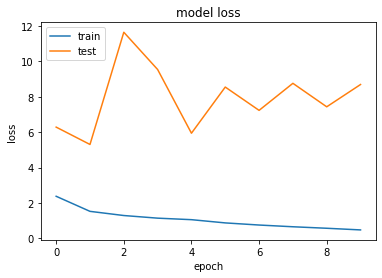

In [47]:
visualize(hist)

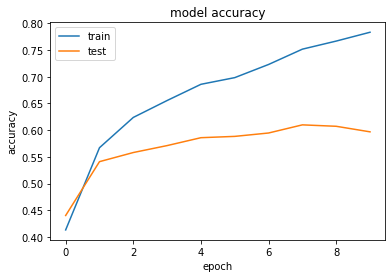

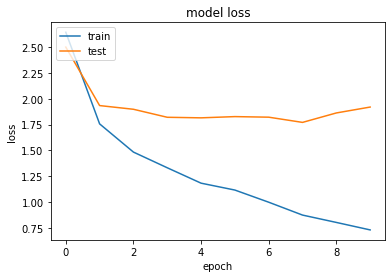

In [8]:
def visualize(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

visualize(hist)

In [15]:
file = 'F:\\doodles\\mobilenet'
for i in tqdm(range(11, 250)):
    try:
        X_train, X_test, y_train, y_test = load_and_split(i, le)
        hist = model.fit(X_train, y_train, epochs=6, batch_size=250, validation_data=(X_test, y_test))
        
        if i % 5 == 0:
            model.save(file)  
            
        free([X_train, X_test, y_train, y_test])
        
    except KeyboardInterrupt:
        print("Stopped. Current bucket is {}".format(str(i)))
        break

  0%|          | 0/239 [00:00<?, ?it/s]

Epoch 1/6
555/555 [==============================] - 22s 40ms/step - loss: 1.0715 - accuracy: 0.7237 - val_loss: 5.6831 - val_accuracy: 0.0029
Epoch 2/6
555/555 [==============================] - 22s 40ms/step - loss: 0.7142 - accuracy: 0.8044 - val_loss: 5.6835 - val_accuracy: 0.0029
Epoch 3/6
555/555 [==============================] - 22s 40ms/step - loss: 0.5312 - accuracy: 0.8492 - val_loss: 5.6838 - val_accuracy: 0.0029
Epoch 4/6
555/555 [==============================] - 22s 40ms/step - loss: 0.4081 - accuracy: 0.8814 - val_loss: 5.6841 - val_accuracy: 0.0029
Epoch 5/6
555/555 [==============================] - 22s 40ms/step - loss: 0.3275 - accuracy: 0.9031 - val_loss: 5.6843 - val_accuracy: 0.0029
Epoch 6/6
555/555 [==============================] - 22s 40ms/step - loss: 0.2713 - accuracy: 0.9187 - val_loss: 5.6845 - val_accuracy: 0.0029


  0%|          | 1/239 [05:34<22:07:07, 334.57s/it]

Stopped. Current bucket is 12


### Примерно на 8 бакете произошел резкое падение точности на тестовой выборке почти до нуля. Изучив разные источники, возможной причиной может оказаться слишком высокий дропаут (По умолчанию он около 0.001, а я выставил на 0.4). Придется начать сначала умешнив значение.

### Попробовал еще раз с дефолтным дропаутом и то же самое. Возможно проблема в оптимизаторе или начальных весах.

In [7]:
from tensorflow.keras.applications.mobilenet import MobileNet
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import top_k_categorical_accuracy

tf.config.experimental.set_memory_growth(tf.config.get_visible_devices('GPU')[0], True)

CATEGORIES = len(reshaped['category'].unique())


inputs = keras.layers.Input(shape=(RESIZED,))
reshape = keras.layers.Reshape((56,56,3), input_shape=(RESIZED,))(inputs)
rescale = keras.layers.experimental.preprocessing.Rescaling(scale=1./255.)(reshape)

base_model = MobileNet(include_top=False,
                       weights=None,
                       input_shape=(56, 56, 3),
                       classes=CATEGORIES)(rescale)

pool = tf.keras.layers.GlobalMaxPool2D()(base_model)

predictions = tf.keras.layers.Dense(CATEGORIES, activation='softmax')(pool)

model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
import random
from tensorflow.keras.applications.mobilenet import preprocess_input

MAX_VALUE = 130_000
MAX_FILE_NUM = 200
FILEMANE_PATTERN = 'F:\\doodles\\bucket_{}.csv'

def data_generator(encoder, batch_size=500):
    while True:
        file_num = random.randint(0, MAX_FILE_NUM)
        skip = sorted(random.sample(range(1,MAX_VALUE), MAX_VALUE - batch_size))
        df = pd.read_csv(FILEMANE_PATTERN.format(str(file_num)),
                         skiprows=skip,
                         nrows=batch_size,
                         dtype=get_dtypes())
        df.drop(columns=['Unnamed: 0'], inplace= True)
        df = convert(df)
        df["category_enc"] = encoder.transform(df['category'])
        y = df['category_enc']
        to_drop = ['category', 'category_enc']
        yield preprocess_input(df.drop(columns=to_drop)).values, y.values
        
gen = data_generator(le, batch_size=2000)

In [53]:
next(gen)

(array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]),
 array([  0,   0,   0, ..., 218, 218, 218]))

In [20]:
def get_val_data(encoder, i=249):
    df = load_data(i, 1)
    df["category_enc"] = encoder.transform(df['category'])
    y = df['category_enc']
    to_drop = ['category', 'category_enc']
    return df.drop(columns=to_drop), y

X_val, y_val = get_val_data(le)

In [58]:
try:
    hist = model.fit(x=gen,
                 epochs=15,
                 steps_per_epoch=50,
                 validation_data=(X_val, y_val))
except KeyboardInterrupt:
    print("Stopped.")
        

MemoryError: Unable to allocate 144. MiB for an array with shape (9408, 2000) and data type float64

In [57]:
file = 'F:\\doodles\\mobilenet'
STEP = 2
for i in tqdm(range(1)):
    try:
        X_train, X_test, y_train, y_test = load_and_split(i, le)
        hist = model.fit(X_train, y_train, epochs=10, batch_size=150, validation_data=(X_test, y_test))
        
        if i % 5 == 0:
            model.save(file)  
            
        free([X_train, X_test, y_train, y_test])
        
    except KeyboardInterrupt:
        print("Stopped. Current bucket is {}".format(str(i)))
        break

  0%|          | 0/1 [00:04<?, ?it/s]


MemoryError: Unable to allocate 1.00 KiB for an array with shape (1024,) and data type uint8